# Business Question:

**Are wedding vendors with sustainable practices more cost effective?**
     In the ever-evolving wedding industry, a pressing issue arises. This investigation tackles a key challenge for businesses in this field. While sustainability gains prominence—adopting eco-friendly materials, ethical labor, and environmentally conscious practices—businesses also pursue competitiveness, viability, and profitability.

**Sustainability**:In business primarily centers on two key areas: the environmental impact of operations and their societal influence. The primary goal is to foster positive impacts in at least one of these 
realms. Yet, neglecting this responsibility can lead to adverse outcomes, including environmental harm, societal inequalities, and injustices.s (Spiliakos, 2022)


**Cost_effectiveness**:Cost efficiencies aim to cut expenses without compromising quality. This involves comparing output benefits to input costs. Assessing revenue versus expenses reveals areas for savings and efficiency enhancements in your organization.(indeed, 2022) 

Balancing sustainability with financial viability is challenging. Despite aligning with ethical and environmental aims, concerns surface about their cost impact. The key issue is whether sustainable methods raise production costs, impacting pricing and competitiveness.

It's more than just cost analysis—it's about merging environmental responsibility with financial sustainability. Striking a balance is crucial for wedding vendors' success in an aware market.




# Analysis

In [54]:
#importing pandas
import pandas as pd

#storing the path to the dataset
file = "./Business_ analysis_final excel 1.xlsm"

#reading the file into Python through pandas
analysis=pd.read_excel(io = file)

#checking result
analysis.head(n=10)

#Note: column 'rating' data was modified to a float type in excel before reading into Python for analysis purposes

,vendor_id,vendor_category_no,vendor_depart,vendor_location,vendor_sustainable,product_id,price_unit,rating,price_ce,Is_cost_effective
0,ven_01,9,venues,san ramon,1,prod_001,14000.0,4.8,2,Yes
1,ven_02,9,venues,acampo,1,prod_002,9500.0,4.1,1,Yes
2,ven_03,9,venues,hollister,1,prod_003,27000.0,4.8,2,Yes
3,ven_04,9,venues,half moon bay,1,prod_004,16000.0,4.9,2,Yes
4,ven_05,9,venues,san francisco,1,prod_005,24000.0,4.8,2,Yes
5,ven_06,9,venues,pleasanton,1,prod_006,10000.0,4.9,2,Yes
6,ven_07,9,venues,walnut creek,1,prod_007,18500.0,0.0,3,No
7,ven_08,9,venues,oakland,0,prod_008,15000.0,4.9,2,Yes
8,ven_09,9,venues,el cerrito,1,prod_009,9000.0,5.0,2,Yes
9,ven_10,9,venues,san mateo,1,prod_010,4500.0,5.0,2,Yes


In [58]:
#analyzing info related to each feature to audit data quality

analysis.info(verbose=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           850 non-null    object 
 1   vendor_category_no  850 non-null    int64  
 2   vendor_depart       850 non-null    object 
 3   vendor_location     850 non-null    object 
 4   vendor_sustainable  850 non-null    int64  
 5   product_id          850 non-null    object 
 6   price_unit          850 non-null    float64
 7   rating              850 non-null    int32  
 8   price_ce            850 non-null    int64  
 9   Is_cost_effective   850 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 63.2+ KB


In [59]:
# As rating column is in int which has been converted into float

#converting data types with a dictionary
datatypes={"rating":float}

#instantiating the dataset as an object
analysis=pd.read_excel(io = file,
                      dtype=datatypes)# applying new data types 

#displaying 5 rows of the modified table
analysis.head(n=5)


,vendor_id,vendor_category_no,vendor_depart,vendor_location,vendor_sustainable,product_id,price_unit,rating,price_ce,Is_cost_effective
0,ven_01,9,venues,san ramon,1,prod_001,14000.0,4.8,2,Yes
1,ven_02,9,venues,acampo,1,prod_002,9500.0,4.1,1,Yes
2,ven_03,9,venues,hollister,1,prod_003,27000.0,4.8,2,Yes
3,ven_04,9,venues,half moon bay,1,prod_004,16000.0,4.9,2,Yes
4,ven_05,9,venues,san francisco,1,prod_005,24000.0,4.8,2,Yes


**Descriptive Statistics**

In [20]:
#Analyzing using Descriptive statistics on numeric column
Descriptive_statistics = analysis.describe(include='number').round(decimals=2)

#slicing only two column for comparision
Descriptive_statistics[ ['price_unit','rating'] ]

#Below data shows Mean, Standard deviation, min/max and quantile values for field Price_unit and Vendor ratings

,price_unit,rating
count,850.00,850.00
mean,1334.60,3.82
std,3820.44,1.98
min,0.52,0.00
25%,90.00,4.00
50%,175.00,4.90
75%,400.00,5.00
max,32000.00,5.00


In [56]:
#apply value_counts to vendor_depart for analysisng the number of vendors in each department/category

analysis["vendor_depart"].value_counts(normalize = False , #percentage
                sort      = True,                          #sort by frequency
                ascending = False).round(decimals = 2)     #smallest value?
                                  

vendor_depart
hair and makeup     391
catering            103
venues               50
jewelry              50
invitations          50
dress and attire     50
photo and video      49
flowers              42
music                35
rental               30
Name: count, dtype: int64

In [32]:
#using group by function filtering the data for sustainable and price

Grouping = analysis.groupby('vendor_sustainable')['price_unit']

# Calculate mean and standard deviation for both Sustaniable Vendors (1) and non-sustainable vendors (0), and rounded to 2 decimals
Mean_price_unit = Grouping.mean().round(decimals=2)
Std_dev_price_unit = Grouping.std().round(decimals=2)


print("Mean price unit: \n")
print(Mean_price_unit)

print("\nStd.dev price unit: \n")
print(Std_dev_price_unit)

Mean price unit: 

vendor_sustainable
0     710.25
1    1894.85
Name: price_unit, dtype: float64

Std.dev price unit: 

vendor_sustainable
0    2242.1
1    4748.4
Name: price_unit, dtype: float64


It appears that mean of Price quoted by non-sustainable vendors are significantly lower compared to mean of price quoted by sustainable vendors, and standard deviation of price for non-sustainable vendors are lower to sustainable vendors

In [33]:
#apply value_counts to vendor_sustainable for finding the percentage of sustainable and non sustainable vendors

analysis["vendor_sustainable"].value_counts(normalize = True ,  
                sort      = False,
                ascending = False).round(decimals = 3)

vendor_sustainable
1    0.527
0    0.473
Name: proportion, dtype: float64

Indicates the total number of data recorded between both vendor groups, and found 52.7 % of data recorded are for sustainable vendors

**Liner Pearson**

In [39]:
# Applying linear pearson method  and converting correlation matrix into data frame 

analysis_correlation = analysis.corr(method = 'pearson',  
             min_periods = 150,                   #set to min number of observation
             numeric_only =True).round(decimals = 2)
#result
analysis_correlation

,vendor_category_no,vendor_sustainable,price_unit,rating,price_ce
vendor_category_no,1.00,0.05,0.45,0.34,-0.08
vendor_sustainable,0.05,1.00,0.15,0.01,0.12
price_unit,0.45,0.15,1.00,0.06,0.13
rating,0.34,0.01,0.06,1.00,-0.06
price_ce,-0.08,0.12,0.13,-0.06,1.00


Assessing the impact of multiple variables on Price quoted by vendor groups. Key factors/variables are found to be category, rating, vendor sustainability, and cost effectiveness of price.

**Heatmap  for liner correlation**

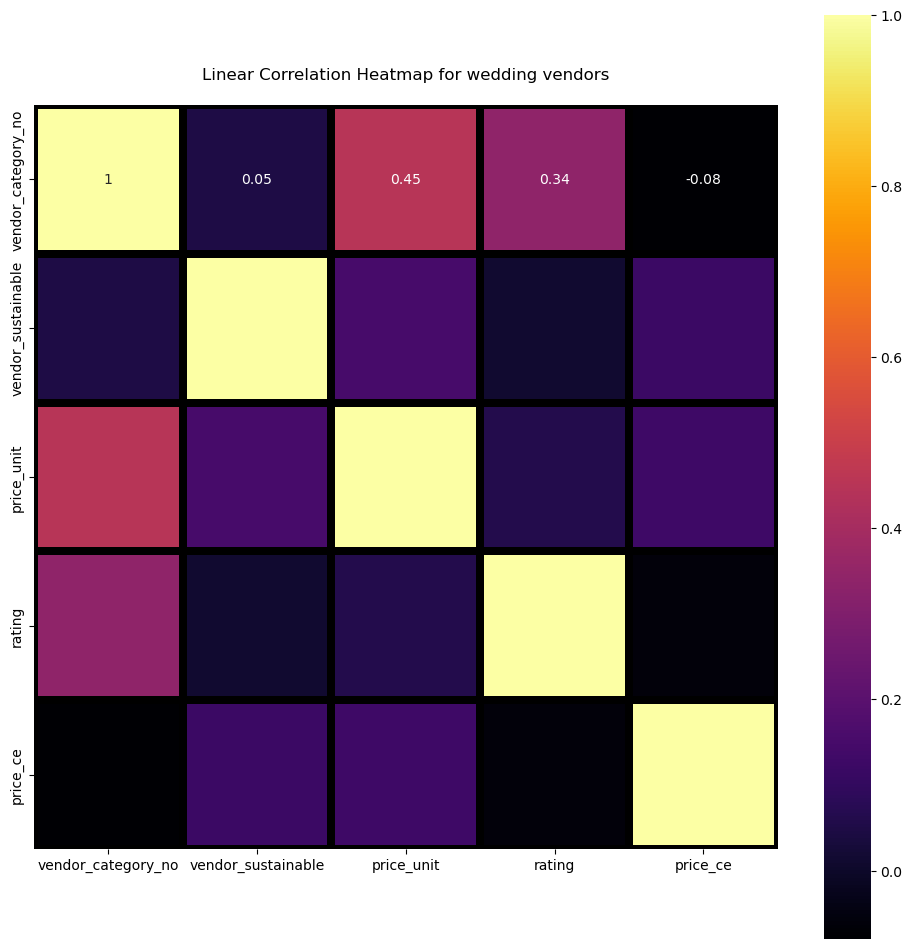

In [40]:
#importing package

import matplotlib.pyplot as plt   #data visualization
import seaborn as sns             #data visualization



#specifying a plot size
fig, ax = plt.subplots( figsize = (12 , 12) )


# developing a heatmap
sns.heatmap(data       = analysis_correlation,  # the correlation matrix
            cmap       = 'inferno'    ,         # colors
            square     = True         ,         # tightening the layout
            annot      = True         ,         # should there be numbers in the heatmap
            linecolor  = 'black'      ,         # lines between boxes
            linewidths = 5.5          )         # how thick should the lines be?


# title for heatmap
plt.title(label = """
Linear Correlation Heatmap for wedding vendors
""")


#displaying
plt.show(block = True)

From heat map, it's inferred that the highest impact on price is realized by category (and the reason is valid as a jewelry might be more expensive than a furniture rental) and the rating.
 
A category of a product is unique to a vendor, and sustainability is a vendor characteristics 
Hence we analyze deeper to verify relation between sustainability and Cost

For our analysis, Cost is considered a dependent variable, Product category is considered control variable
Vendor sustainability is considered an Independent variable

Since there are multiple categories, their impact on cost is identified by performing Analysis of variance (ANOVA)
Two-way Anova is performed to find impact of both sustainability and Product categories on Cost

**Statistical Test**

In [43]:
#importing packages

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Converting 'vendor_sustainbale' and 'department' to a categorical variable

analysis['vendor_sustainable'] = pd.Categorical(analysis['vendor_sustainable'])
analysis['vendor_depart'] = pd.Categorical(analysis['vendor_depart'])

# Two-way ANOVA model
anova_test = ols("""price_unit ~ C(vendor_sustainable) + C(vendor_depart) 
                 + C(vendor_sustainable):C(vendor_depart)""", data=analysis).fit()

# Perform ANOVA
result = anova_lm(anova_test)

# ANOVA result
print(result)

# F-value and p-value

F_value = anova_result['F'][2]  # Change index based on your specific data
p_value = anova_result['PR(>F)'][2]  # Change index based on your specific data

# Display F-statistic and p-value

print(f"F-value: {F_value}")
print(f"P-value: {p_value}")

print('\n The Analysis Result:\n') 

#using conditional statement testing the significance using p-value

if p_value<0.05:
    print("""
        Rejecting null hypothesis. There is a significant difference in cost 
        between Sustainable Vendor and Non-Sustainable Vendor groups""")
else:
    print("""
    Failing to reject null hypothesis.There is no significant difference 
    in cost between Sustainable Vendors and Non-Sustainable Vendors""")

                                           df        sum_sq       mean_sq  \
C(vendor_sustainable)                     1.0  2.973263e+08  2.973263e+08   
C(vendor_depart)                          9.0  8.227607e+09  9.141786e+08   
C(vendor_sustainable):C(vendor_depart)    9.0  1.373733e+08  1.526370e+07   
Residual                                830.0  3.729491e+09  4.493362e+06   

                                                 F         PR(>F)  
C(vendor_sustainable)                    66.170112   1.503785e-15  
C(vendor_depart)                        203.450893  3.622582e-203  
C(vendor_sustainable):C(vendor_depart)    3.396943   4.138350e-04  
Residual                                       NaN            NaN  
F-value: 3.3969430405836634
P-value: 0.0004138350046587462

 The Analysis Result:


        Rejecting null hypothesis. There is a significant difference in cost 
        between Sustainable Vendor and Non-Sustainable Vendor groups


C:\Users\jkart\AppData\Local\Temp\ipykernel_17952\2843220875.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F_value = anova_result['F'][2]  # Change index based on your specific data
C:\Users\jkart\AppData\Local\Temp\ipykernel_17952\2843220875.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_result['PR(>F)'][2]  # Change index based on your specific data


For conducting statistical tests, below are considered for Hypothesis testing:

Ho:The mean of price between Sustainable and Non-sustainable vendors are equal
Ha:The mean of price between Sustainable and Non-sustainable vendors are not equal

After analyzing the interactions between two different variables by performing Anova, results show that the p-value is significantly less than 0.05, thus rejecting null Hypothesis.

We can now statistically conclude that, the mean of price between sustainable and non-sustainable vendors are not equal, thus indicating difference between both vendor groups.

Conducting analysis further to show which vendor group will offer better price indicating cost effectiveness.

**Scatter plot**

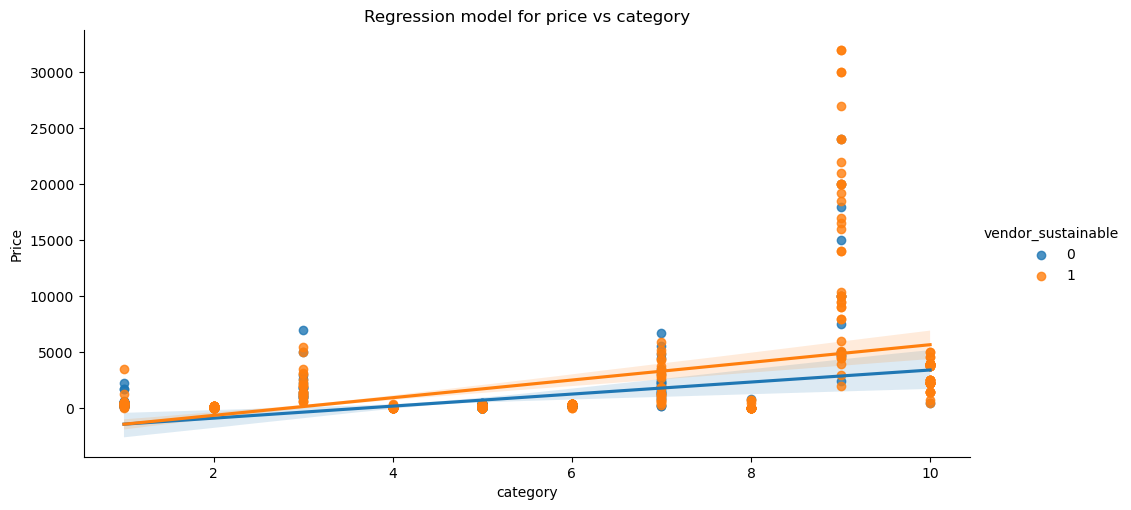

In [48]:
sns.lmplot(x       = 'vendor_category_no' ,    # x-axis feature
           y       = 'price_unit' ,            # y-axis feature
           hue     = 'vendor_sustainable'    , # categorical data for subsets
           scatter = True    ,                 # renders a scatter plot
           fit_reg = True    ,                 # renders a regression line
           aspect  = 2       ,                 # aspect ratio for plot
           data    = analysis)

#displaying the visualization
plt.title       (label  = "Regression model for price vs category")
plt.xlabel      (xlabel = "category"                              )
plt.ylabel      (ylabel = 'Price'                                 )
plt.show        (block  = True                                    )










A scatter plot plotted against price and categories, and differentiated between both vendor groups indicate that prices quoted by sustainable vendors are higher on average compared to non-sustainable vendors.
The highest skewness is contributed by the category 'venue' where sustainable vendors were quoting significantly higher.
It can also be noted that category 1 = 'dress and attire', both vendor groups were quoting similar prices not resulting in significant difference.

**Box plot**

C:\Users\jkart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jkart\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


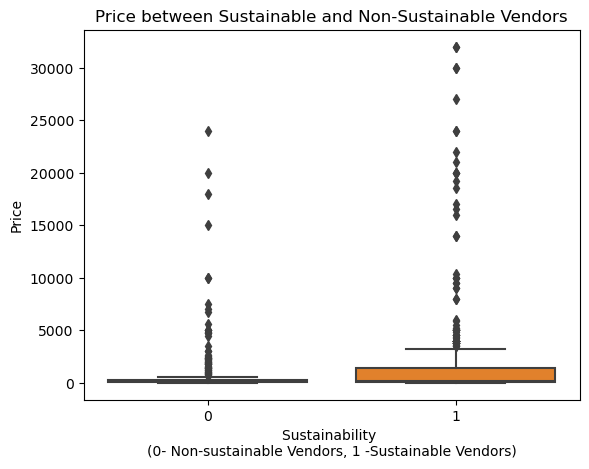

In [49]:
# Creating a box plot for 'price' for the sustainable and  non-sustainable vendors 
sns.boxplot(x='vendor_sustainable', y='price_unit', data=analysis)

#labels and title
plt.title(f'Price between Sustainable and Non-Sustainable Vendors')
plt.xlabel('Sustainability \n(0- Non-sustainable Vendors, 1 -Sustainable Vendors)')
plt.ylabel('Price')

#plot
plt.show()




Box plot are constructed between prices quoted by both vendor groups, and it can be noted that overall Inter-quartile range for sustainable vendors is larger compared to non-sustainable vendors. The max value for non-sustainable vendors are also lower to sustainable vendors.

Above diagram indicates, non-sustainable vendors offering better and more cost effective solution than their non-sustainable counter parts.

**Histogram**

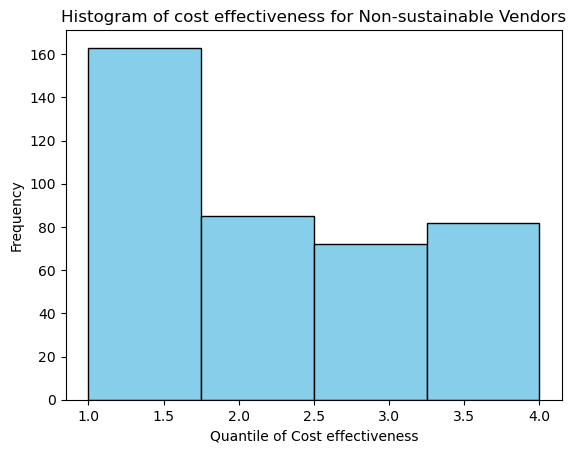

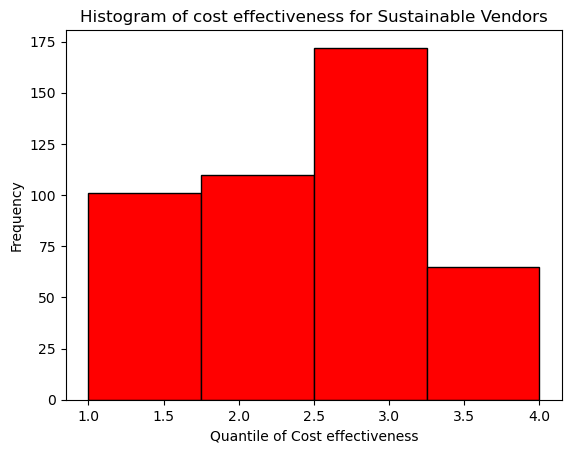

In [50]:
#histogram for non sustainable vendors
histogram_ns = analysis[analysis['vendor_sustainable'] == 0]

plt.hist(histogram_ns['price_ce'], bins=4, color='skyblue', edgecolor='black') 

#labels and title
plt.title('Histogram of cost effectiveness for Non-sustainable Vendors')
plt.xlabel('Quantile of Cost effectiveness')
plt.ylabel('Frequency')

#plot
plt.show()

#histogram for sustainable vendors

histogram_s = analysis[analysis['vendor_sustainable'] == 1]

plt.hist(histogram_s['price_ce'], bins=4, color='red', edgecolor='black')  

plt.title('Histogram of cost effectiveness for Sustainable Vendors')
plt.xlabel('Quantile of Cost effectiveness')
plt.ylabel('Frequency')


plt.show()

Above two Bar-plot is indicates multiple parts/products offered by both vendor groups within the price quantile for overall data. 
With 1 and 2 quantiles indicating cost effective solutions and, 3 and 4 otherwise, non-sustainable vendors were able to offer higher list of products within the cost effective category (1 and 2 quantiles).

# Result of Analysis:
Statistical test revealed that there is a difference in mean of price within both vendor groups.

Above scatter plot, Box plot and Bar-chart clearly explains that the price offered by non-sustainable vendors are significantly cheaper and cost effective than compared to their sustainable counter parts.

This evidence strongly indicates that, overall, non-sustainable vendors are more cost-effective than sustainable vendors within this context. Despite the emphasis on sustainability, the data suggests that non-sustainable vendors have a competitive edge in terms of pricing, making them a more economical choice for consumers.


# Actionable Insights

Creating cost effectiveness within sustainable vendors compared to non sustainable ones in the wedding business involves strategic planning and innovations. The actionable insights I would recommend is 

**Economies of scale** refer to cost advantage that can occur when a company increases their scale of production and becomes more efficient,resulting in decreased cost-per unit.Businesses benefit significantly from this. Forming networks for sustainable wedding vendors means creating platforms where they collaborate, share resources, and bargain with suppliers. Negotiating bulk purchases secures discounted rates by leveraging the collective buying power of vendors.(GoCardless, 2020)    


**Financial Incentives**Financial incentives, often provided by businesses or organizations, aim to drive particular behaviors or choices. These rewards, given in monetary or non-monetary forms, motivate individuals or groups to align their actions with specific goals. Negotiate reduced prices for sustainable goods in bulk purchases by collaborating with suppliers. Secure lower rates for eco-friendly items when ordering in larger quantities. Offer discounts contingent on meeting sustainability targets, providing refunds if those goals are achieved. (Hugh Bachmann) 
  
Implement these strategies to change the perception, proving that sustainable vendors can be more cost-efficient than non-sustainable ones in the wedding sector.


**References**

GoCardless. (2020, May). How your business can benefit from economies of scale.

Hugh Bachmann, R. L. (n.d.). The powerful role financial incentives can play in a transformation. Retrieved from https://www.mckinsey.com/capabilities/transformation/our-insights/the-powerful-role-financial-incentives-can-play-in-a-transformation

indeed. (2022, june 24). Retrieved from https://www.indeed.com/career-advice/career-development/cost-efficiencies

Spiliakos, A. (2022). What Does "Sustainability" Mean in Business? Harvard Business School online.

 https://stackoverflow.com/
